In [1]:
import keras 
import numpy as np 
from keras.datasets import imdb 

Using CNTK backend
C:\Anaconda3\lib\site-packages\keras\backend\cntk_backend.py:21: UserWarning: CNTK backend warning: GPU is not detected. CNTK's CPU version is not fully optimized,please run with GPU to get better performance.
  'CNTK backend warning: GPU is not detected. '


In [2]:
(X_train, y_train), (X_test, y_test) = imdb.load_data()

In [3]:
np.reshape(X_train[0], (1, -1))

array([[    1,    14,    22,    16,    43,   530,   973,  1622,  1385,
           65,   458,  4468,    66,  3941,     4,   173,    36,   256,
            5,    25,   100,    43,   838,   112,    50,   670, 22665,
            9,    35,   480,   284,     5,   150,     4,   172,   112,
          167, 21631,   336,   385,    39,     4,   172,  4536,  1111,
           17,   546,    38,    13,   447,     4,   192,    50,    16,
            6,   147,  2025,    19,    14,    22,     4,  1920,  4613,
          469,     4,    22,    71,    87,    12,    16,    43,   530,
           38,    76,    15,    13,  1247,     4,    22,    17,   515,
           17,    12,    16,   626,    18, 19193,     5,    62,   386,
           12,     8,   316,     8,   106,     5,     4,  2223,  5244,
           16,   480,    66,  3785,    33,     4,   130,    12,    16,
           38,   619,     5,    25,   124,    51,    36,   135,    48,
           25,  1415,    33,     6,    22,    12,   215,    28,    77,
      

In [4]:
print(X_train.shape)
print(y_train.shape)

(25000,)
(25000,)


In [5]:
avg_len = list(map(len, X_train))
np.mean(avg_len)

238.71364

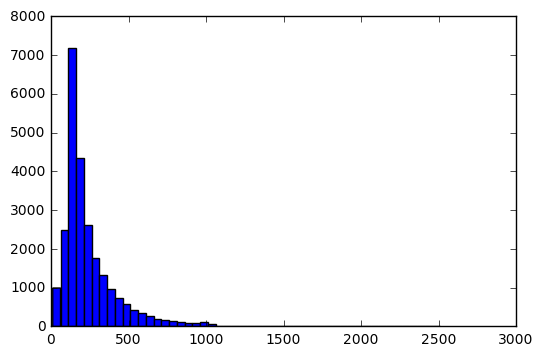

In [6]:
import matplotlib.pyplot as plt 
plt.hist(avg_len, bins=range(min(avg_len), max(avg_len) + 50, 50)) 
plt.show()

In [7]:
from keras.models import Sequential 
from keras.layers import Dense 
from keras.layers import Flatten 
from keras.layers.embeddings import Embedding 
from keras.preprocessing import sequence 
import keras 
import numpy as np 
from keras.datasets import imdb 
(X_train, y_train), (X_test, y_test) = imdb.load_data() 
m=max(list(map(len, X_train))+ list(map(len, X_test)))
print(m)

2494


In [8]:
maxword = 400
X_train = sequence.pad_sequences(X_train, maxlen = maxword)
X_test = sequence.pad_sequences(X_test, maxlen = maxword)
vocab_size = np.max([np.max(X_train[i]) for i in range(X_train.shape[0])]) + 1

In [9]:
model = Sequential()
model.add(Embedding(vocab_size, 64, input_length = maxword))
model.add(Flatten())
model.add(Dense(500, activation = 'relu'))
model.add(Dense(500, activation = 'relu'))
model.add(Dense(200, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [10]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy']) 
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 400, 64)           5669568   
_________________________________________________________________
flatten_1 (Flatten)          (None, 25600)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               12800500  
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_3 (Dense)              (None, 200)               100200    
_________________________________________________________________
dense_4 (Dense)              (None, 50)                10050     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total para

In [12]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 20,batch_size = 100, verbose = 1)
score = model.evaluate(X_test, y_test)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
  100/25000 [..............................] - ETA: 25:46 - loss: 0.6933 - acc: 0.4900

SystemError: <built-in function Trainer_train_minibatch> returned a result with an error set

In [11]:
print(score)

NameError: name 'score' is not defined

In [18]:
from keras.models import Sequential 
from keras.layers.embeddings import Embedding 
from keras.preprocessing import sequence 
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv1D, MaxPooling1D
model = Sequential()
model.add(Embedding(vocab_size, 64, input_length = maxword))
model.add(Conv1D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPooling1D(pool_size = 2))
model.add(Dropout(0.25))
model.add(Conv1D(filters = 128, kernel_size = 3, padding = 'same',activation = 'relu'))
model.add(MaxPooling1D(pool_size = 2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 400, 64)           5669568   
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 400, 64)           12352     
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 200, 64)           0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 200, 64)           0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 200, 128)          24704     
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 100, 128)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 100, 128)          0         
__________

In [19]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 20, batch_size = 100)
scores = model.evaluate(X_test, y_test, verbose = 1)
print(scores)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 12s - loss: 0.4860 - acc: 0.7189 - val_loss: 0.2693 - val_acc: 0.8892
Epoch 2/20
25000/25000 [==============================] - 10s - loss: 0.2236 - acc: 0.9138 - val_loss: 0.2645 - val_acc: 0.8916
Epoch 3/20
25000/25000 [==============================] - 10s - loss: 0.1587 - acc: 0.9424 - val_loss: 0.3100 - val_acc: 0.8764
Epoch 4/20
25000/25000 [==============================] - 10s - loss: 0.1142 - acc: 0.9597 - val_loss: 0.3152 - val_acc: 0.8799
Epoch 5/20
25000/25000 [==============================] - 10s - loss: 0.0890 - acc: 0.9699 - val_loss: 0.3662 - val_acc: 0.8758
Epoch 6/20
25000/25000 [==============================] - 10s - loss: 0.0641 - acc: 0.9790 - val_loss: 0.4649 - val_acc: 0.8646
Epoch 7/20
25000/25000 [==============================] - 10s - loss: 0.0493 - acc: 0.9840 - val_loss: 0.4959 - val_acc: 0.8565
Epoch 8/20
25000/25000 [==============================

In [21]:
print(scores)

[1.7833950957139582, 0.84228000000000003]


In [28]:
from keras.layers import LSTM
model = Sequential()
model.add(Embedding(vocab_size, 64, input_length = maxword))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 400, 64)           5669568   
_________________________________________________________________
lstm_12 (LSTM)               (None, 400, 128)          98816     
_________________________________________________________________
dropout_16 (Dropout)         (None, 400, 128)          0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 400, 64)           49408     
_________________________________________________________________
dropout_17 (Dropout)         (None, 400, 64)           0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dropout_18 (Dropout)         (None, 32)                0         
__________

In [29]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 5, batch_size = 100)
scores = model.evaluate(X_test, y_test)

print(scores)

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 546s - loss: 0.5645 - acc: 0.6731 - val_loss: 0.3635 - val_acc: 0.8475
Epoch 2/5
25000/25000 [==============================] - 538s - loss: 0.3497 - acc: 0.8590 - val_loss: 0.3994 - val_acc: 0.8179
Epoch 3/5
25000/25000 [==============================] - 537s - loss: 0.2460 - acc: 0.9079 - val_loss: 0.3249 - val_acc: 0.8659
Epoch 4/5
25000/25000 [==============================] - 534s - loss: 0.1802 - acc: 0.9357 - val_loss: 0.3177 - val_acc: 0.8644
Epoch 5/5
25000/25000 [==============================] - 461s   
[0.34172198061943054, 0.85075999999999996]
